<a href="https://colab.research.google.com/github/khrnnisak/PCVK_Genap_2023/blob/master/Pertemuan8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
     

##**Dilasi Tanpa Library**

In [4]:


def dilate(img, sed):
    # Ukuran citra dan SE
    img_height, img_width = img.shape[:2]
    sed_height, sed_width = sed.shape[:2]
    
    # Inisialisasi citra hasil dilasi
    dilated_img = np.zeros((img_height, img_width), dtype=np.uint8)
    
    # Looping pada seluruh piksel citra
    for i in range(img_height):
        for j in range(img_width):
            
            # Cek apakah piksel merupakan bagian dari SE
            if sed[(sed_height-1)//2, (sed_width-1)//2] == 1:
                
                # Looping pada seluruh piksel SE
                for k in range(-(sed_height-1)//2, (sed_height+1)//2):
                    for l in range(-(sed_width-1)//2, (sed_width+1)//2):
                        
                        # Koordinat piksel pada citra yang akan diperiksa
                        row = i + k
                        col = j + l
                        
                        # Cek apakah koordinat piksel valid
                        if (row >= 0) and (row < img_height) and (col >= 0) and (col < img_width):
                            
                            # Cek apakah piksel pada koordinat tersebut bernilai 1
                            if img[row, col] == 255:
                                
                                # Set piksel citra hasil dilasi menjadi 1 dan keluar dari loop
                                dilated_img[i, j] = 255
                                break
                                
                    else:
                        continue
                    break
                
    return dilated_img


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

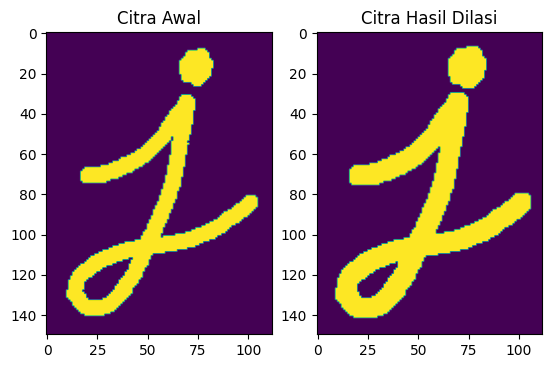

In [6]:
# Membaca citra grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Membuat Structuring Element berbentuk cross 3x3
sed = np.zeros((3, 3), dtype=np.uint8)
sed[1, :] = 1
sed[:, 1] = 1

# Dilasi citra dengan Structuring Element cross 3x3
dilated_img = dilate(img, sed)

# Menampilkan citra input dan citra hasil dilasi
plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_img), plt.title('Citra Hasil Dilasi')


##**Dilasi Dengan Lirary**

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

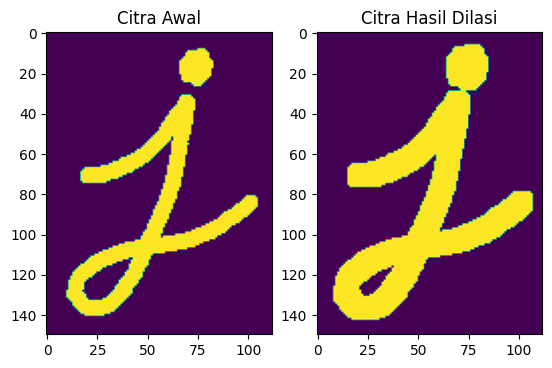

In [7]:
kernel = np.ones((5,5), np.uint8)
dilation = cv.morphologyEx(img, cv.MORPH_DILATE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

##**Erosi Tanpa Library**

<ipython-input-8-4cabb85692c7>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img1, cmap ="gray"), plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

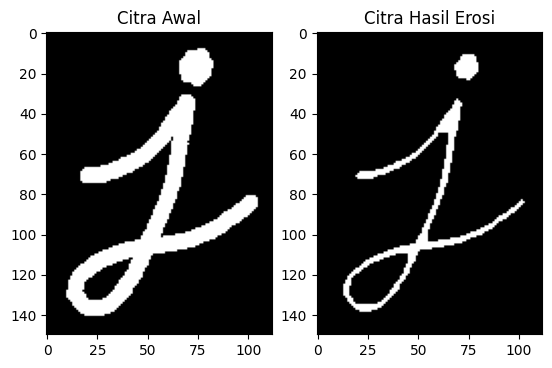

In [8]:
img1= cv.imread('/content/drive/MyDrive/PCVK/j.png', 0)

m,n= img1.shape 

plt.imshow(img1, cmap="gray")

k=5
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

imgErode= np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img1[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)
plt.subplot(121), plt.imshow(img1, cmap ="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')


##**Erosi Dengan Library**

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

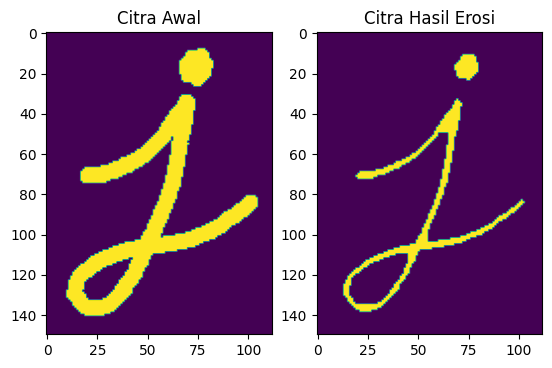

In [9]:
kernel = np.ones((5,5), np.uint8)
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
    

##**Opening Dengan Library**

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

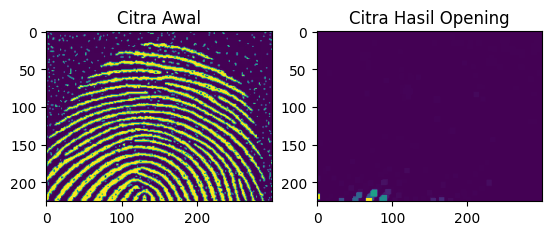

In [10]:
img_op = cv.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

kernel = np.ones((7,7), np.uint8)
opening = cv.morphologyEx(img_op, cv.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img_op), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening), plt.title('Citra Hasil Opening')
     


##**Closing Dengan Library**

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

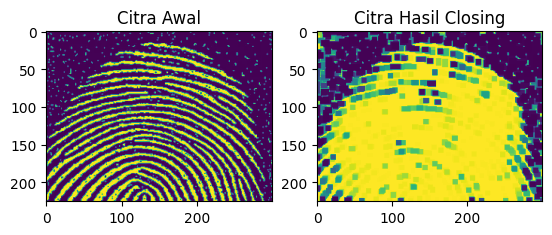

In [11]:
kernel = np.ones((7,7), np.uint8)
closing = cv.morphologyEx(img_op, cv.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img_op), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(closing), plt.title('Citra Hasil Closing')
     

(<Axes: title={'center': 'Citra Hasil Dilasi 3x3'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi 3x3'))

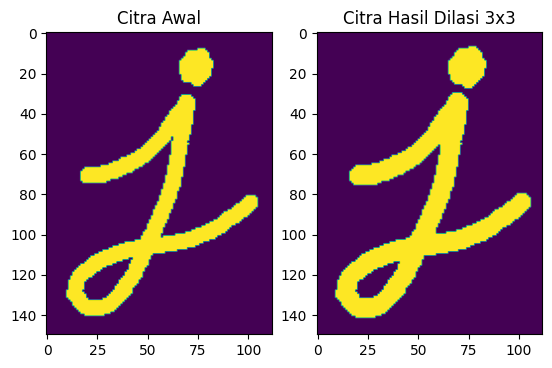

In [12]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
cross3 = cv.morphologyEx(img, cv.MORPH_DILATE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(cross3), plt.title('Citra Hasil Dilasi 3x3')
    

(<Axes: title={'center': 'Citra Hasil Dilasi 5x5'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi 5x5'))

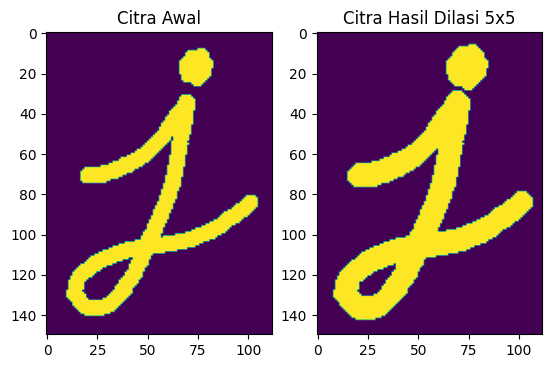

In [13]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
cross3 = cv.morphologyEx(img, cv.MORPH_DILATE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(cross3), plt.title('Citra Hasil Dilasi 5x5')



SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

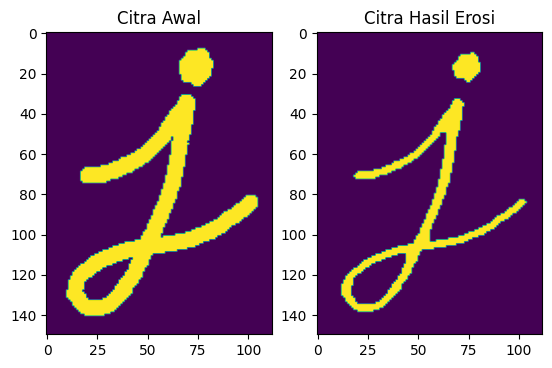

In [17]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,5)) 
erosion = cv.erode(img, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
    

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

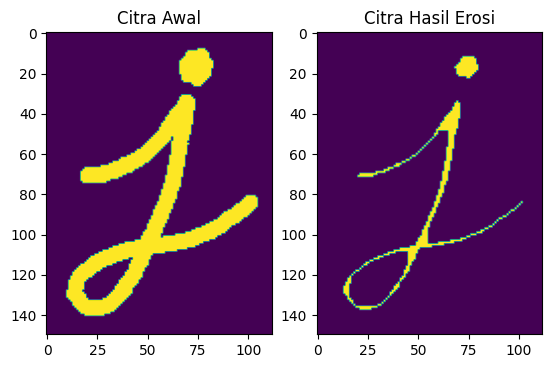

In [18]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,7)) 
erosion = cv.erode(img, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
    

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

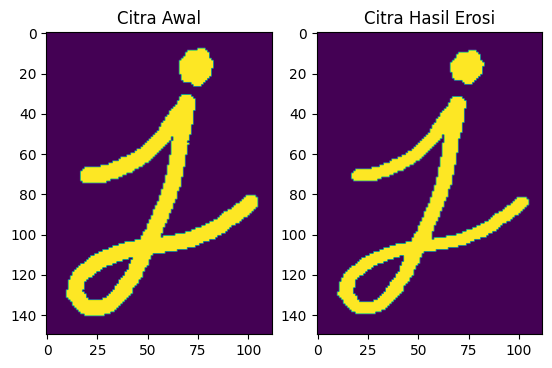

In [19]:
kernel = np.ones((3,1),np.uint8) 
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
 

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

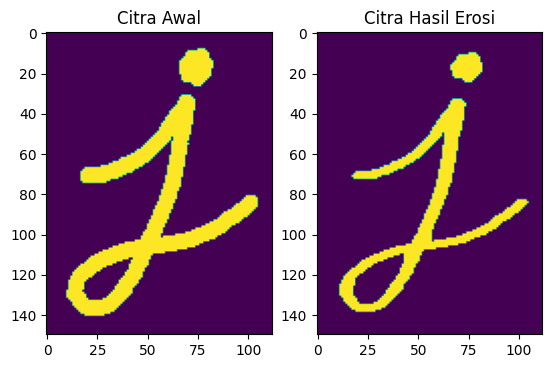

In [20]:
kernel = np.ones((5,1),np.uint8) 
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
